In [1]:
import gluon
import view_gluon

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import utils

utils.set_mplstyle()

In [2]:
Nt = 8

renorm_mu = -58
escale = 1.7606
Tc=167

In [3]:
results = {}

for mode in ["VOS","VR","FULL"]: 

    prop = view_gluon.propagator(Nt,mode,n_samples='all',gtype="coulomb")
    print(Nt,len(prop.prop_info))
    q = prop.q
    D = prop.D
    
    # Z3 average
    qz3, Dz3 = prop.Z3_average(q,D)
    
    # _,_ = prop.half_cut()
    
    prop.q = qz3
    prop.D = Dz3
    
    # Cone cut
    qc, Dc = prop.cone_cut(radius=1)
    
    # Lattice momentum correction
    qi = prop.correct_q(qc,qtype="improved")
    
    # Renormalize
    prop.renormalize(xi=3.453)
    
    results[mode] = {'f':prop.f.copy(), 'D': prop.D.copy(),'alpha':prop.alpha,'q':qi, 'Nconf':len(prop.prop_info), 'chisq': prop.chisq, 'prop_info': prop.prop_info}


8 100


/home/ben/Work/gluon-prop/view_gluon.py:91: RuntimeWarning: divide by zero encountered in divide
  z = xi*p0/norm_p


8 100


/home/ben/Work/gluon-prop/view_gluon.py:91: RuntimeWarning: divide by zero encountered in divide
  z = xi*p0/norm_p


8 44


/home/ben/Work/gluon-prop/view_gluon.py:91: RuntimeWarning: divide by zero encountered in divide
  z = xi*p0/norm_p


VOS 1.000(11) 100 0.0105338839796(11)
VR -0.512(11) 100 7.121640389370(77)
FULL 1.000(11) 44 0.0228698879132(19)


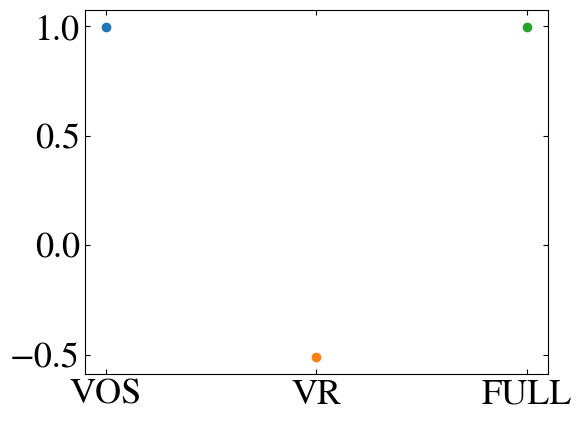

In [4]:
for mode in results.keys():
    print(mode, results[mode]['alpha'] , results[mode]['Nconf'], results[mode]['chisq'])
    plt.scatter(mode,results[mode]['alpha'].mean)


(0.0, 6.0)

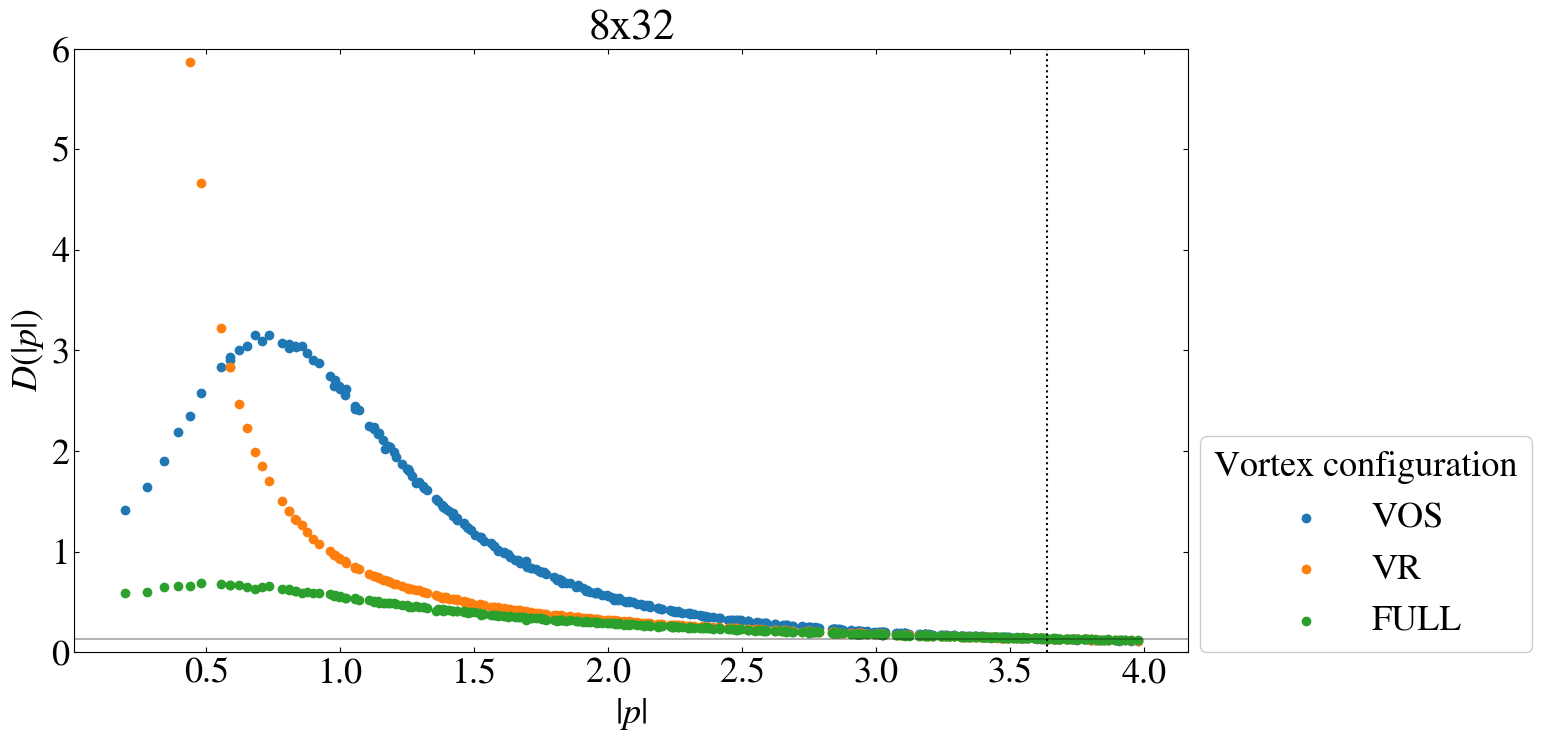

In [5]:
plt.figure(figsize=(16,8))
ax = plt.gca()

for pos,mode in enumerate(results.keys()):
    q = results[mode]['q'].copy()
    q = np.asarray([np.linalg.norm(qi[1:]) for qi in q[q[:,0]==0][1:]])
    D = results[mode]['f'].copy()
    
    mu = q[renorm_mu]
    
    Z = 1/(D[renorm_mu]*mu*2)
    
    D *= Z
    
    label = f"{mode}"
    
    ax.scatter(q,np.asarray([d.mean for d in D]),label=label,ls='-')
        
ax.axvline(mu,0,1,ls=':',c='k')
ax.axhline(1/(2*mu),0,1,c='k',alpha=0.3)

plt.title(f"{Nt}x32")    
plt.legend(loc=(1.01,0),title='Vortex configuration')
plt.ylabel('$D(|p|)$')
#plt.yticks([])
plt.xlabel('$|p|$')
plt.ylim(0,6)
#plt.yscale('log')